In [1]:
import platform
platform.platform()

'macOS-10.16-x86_64-i386-64bit'

In [2]:
!python -V

Python 3.9.7


In [3]:
import pubchempy as pcp
pcp.__version__

'1.0.4'

In [4]:
import pandas as pd
pd.__version__

'1.3.2'

In [5]:
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion)

2021.03.5


In [6]:
quercetine = pcp.get_compounds('quercetine', 'name')

In [7]:
quercetine_smiles = quercetine[0].isomeric_smiles

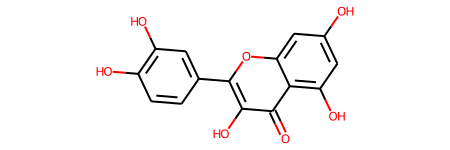

In [8]:
quercetine_mol = Chem.MolFromSmiles(quercetine_smiles)
quercetine_mol

In [9]:
quercetine_sdf = pcp.get_sdf('quercetine', 'name')
print(quercetine_sdf)

5280343
  -OEChem-09302121002D

 32 34  0     0  0  0  0  0  0999 V2000
    6.0682   -0.2704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003    1.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3198    2.7642    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    2.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5381   -0.2945    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.6663   -2.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   10.3984   -1.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003   -0.2704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    1.7296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3083    1.76

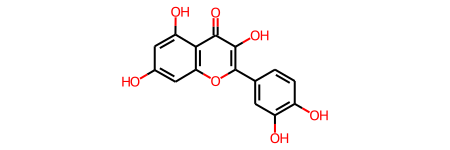

In [10]:
Chem.MolFromMolBlock(quercetine_sdf)

In [11]:
quercetine[0].inchi

'InChI=1S/C15H10O7/c16-7-4-10(19)12-11(5-7)22-15(14(21)13(12)20)6-1-2-8(17)9(18)3-6/h1-5,16-19,21H'

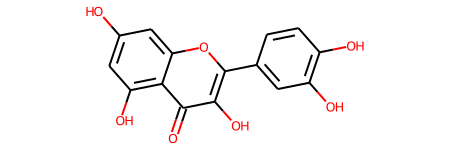

In [12]:
Chem.MolFromInchi(quercetine[0].inchi)

In [13]:
help(Chem.MolFromPDBFile)

Help on built-in function MolFromPDBFile in module rdkit.Chem.rdmolfiles:

MolFromPDBFile(...)
    MolFromPDBFile( (str)molFileName [, (bool)sanitize=True [, (bool)removeHs=True [, (int)flavor=0 [, (bool)proximityBonding=True]]]]) -> Mol :
        Construct a molecule from a PDB file.
        
          ARGUMENTS:
        
            - fileName: name of the file to read
        
            - sanitize: (optional) toggles sanitization of the molecule.
              Defaults to true.
        
            - removeHs: (optional) toggles removing hydrogens from the molecule.
              This only make sense when sanitization is done.
              Defaults to true.
        
            - flavor: (optional) 
        
            - proximityBonding: (optional) toggles automatic proximity bonding
        
          RETURNS:
        
            a Mol object, None on failure.
        
        
    
        C++ signature :
            RDKit::ROMol* MolFromPDBFile(char const* [,bool=True [,boo

In [14]:
!ls

data
homework.ipynb
homework_answer.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
note.ipynb


In [15]:
suppl = Chem.SDMolSupplier('data/PubChem_TCI_phenol_records.sdf')

In [16]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [17]:
mols = [mol for mol in suppl]

In [18]:
len(mols)

117

/opt/anaconda3/envs/lecture-beginner/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 3. Change the maxMols value to display more.
  warnings.warn(


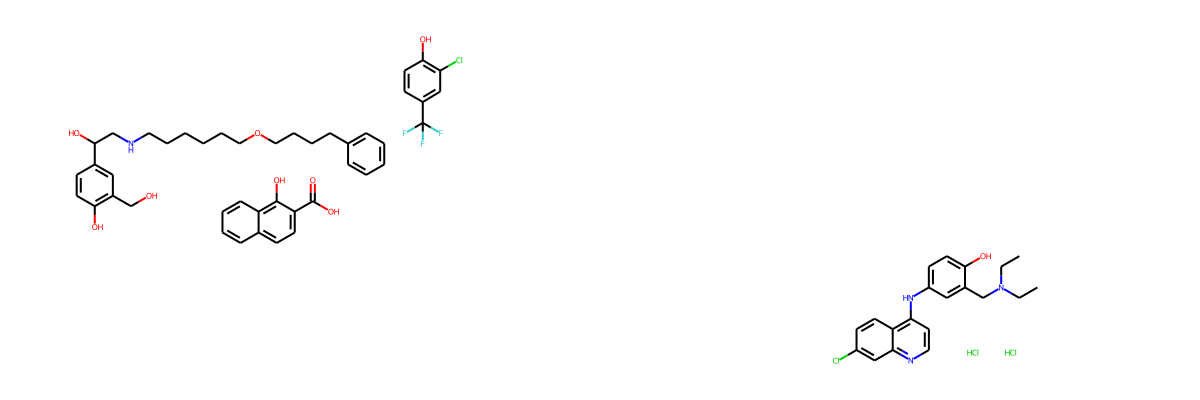

In [19]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, maxMols=3, molsPerRow=3, subImgSize=(400, 400))

In [20]:
from rdkit.Chem import AllChem, PandasTools

In [21]:
df = PandasTools.LoadSDF('data/PubChem_TCI_phenol_records.sdf')

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN

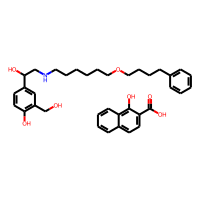

In [22]:
df.head(1)

In [23]:
df.columns

Index(['PUBCHEM_COMPOUND_ID_TYPE', 'PUBCHEM_TOTAL_CHARGE',
       'PUBCHEM_SUBSTANCE_ID', 'PUBCHEM_SUBSTANCE_VERSION',
       'PUBCHEM_EXT_DATASOURCE_NAME', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_SUBSTANCE_SYNONYM', 'PUBCHEM_XREF_EXT_ID',
       'PUBCHEM_EXT_DATASOURCE_URL', 'PUBCHEM_EXT_SUBSTANCE_URL',
       'PUBCHEM_CID_ASSOCIATIONS', 'PUBCHEM_COORDINATE_TYPE', 'ID', 'ROMol',
       'PUBCHEM_BONDANNOTATIONS', 'PUBCHEM_SUBSTANCE_COMMENT',
       'PUBCHEM_GENERIC_REGISTRY_NAME'],
      dtype='object')

In [24]:
df2 = df[['ID', 'ROMol']]

,ID,ROMol
23,253660281,

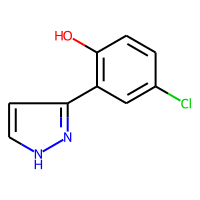

In [25]:
df2.sample(1)

In [26]:
compoundlist = ["phenol", "anisole", "aniline"]
properties = ["iupacname", 'canonicalsmiles']

In [27]:
import sys 
import pandas as pd

df = pd.DataFrame()
for compound in compoundlist:
    try:
        temp = pcp.get_properties(properties, compound, 'name', as_dataframe=True)
        df = pd.concat([df, temp], axis=0, join='outer', sort=True)
    except:
        print(compound)
        print(sys.exc_info())
        pass


In [28]:
df

,CanonicalSMILES,IUPACName
CID,,
996,C1=CC=C(C=C1)O,phenol
7519,COC1=CC=CC=C1,anisole
6115,C1=CC=C(C=C1)N,aniline


In [29]:
PandasTools.AddMoleculeColumnToFrame(df, "CanonicalSMILES")

,CanonicalSMILES,IUPACName,ROMol
CID,,,
996,C1=CC=C(C=C1)O,phenol,

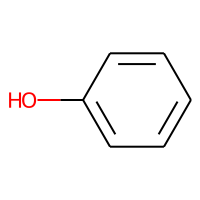

In [30]:
df.head(1)

In [31]:
df["smiles_from_RDKit"] = df["ROMol"].map(Chem.MolToSmiles)

,CanonicalSMILES,IUPACName,ROMol,smiles_from_RDKit
CID,,,,
996,C1=CC=C(C=C1)O,phenol,,Oc1ccccc1

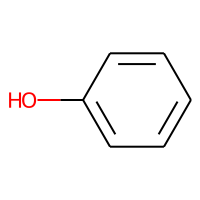

In [32]:
df.head(1)

In [33]:
df_to_csv = df[['IUPACName', 'smiles_from_RDKit']]
df_to_csv

,IUPACName,smiles_from_RDKit
CID,,
996,phenol,Oc1ccccc1
7519,anisole,COc1ccccc1
6115,aniline,Nc1ccccc1


In [34]:
!ls

data
homework.ipynb
homework_answer.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
note.ipynb


In [35]:
df_to_csv.to_csv('output.csv')

In [36]:
!ls

data
homework.ipynb
homework_answer.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
note.ipynb
output.csv


In [37]:
df_from_csv =pd.read_csv('output.csv')
df_from_csv

,CID,IUPACName,smiles_from_RDKit
0,996,phenol,Oc1ccccc1
1,7519,anisole,COc1ccccc1
2,6115,aniline,Nc1ccccc1


In [38]:
!rm output.csv

In [39]:
!ls

data
homework.ipynb
homework_answer.ipynb
lecture_note_RDKit_no1_分子の読み込みと表示と出力.ipynb
lecture_note_RDKit_no2_Descriptorsの使い方.ipynb
lecture_note_RDKit_no3_分子の取り扱い方.ipynb
lecture_note_RDKit_no4_構造変換.ipynb
lecture_note_RDKit_no5_部分構造探索.ipynb
note.ipynb


# No2

In [40]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

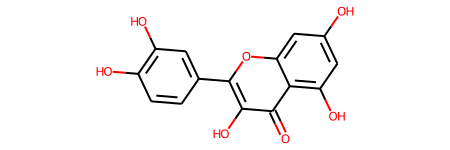

In [41]:
mol = quercetine_mol
mol

In [42]:
len(Descriptors.descList)

208

In [43]:
Descriptors.TPSA(mol)

131.36

In [44]:
Descriptors.NumHDonors(mol)

5

In [45]:
df = df2

,ID,ROMol
98,87561955,

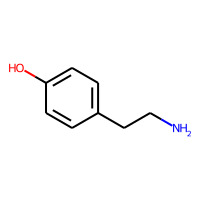

In [46]:
df.sample(1)

In [47]:
df["TPSA"] =df["ROMol"].map(Descriptors.TPSA)
df["MolLogP"] =df["ROMol"].map(Descriptors.MolLogP)
df["qed"] =df["ROMol"].map(Descriptors.qed)

,ID,ROMol,TPSA,MolLogP,qed
36,125308063,,50.94,6.7779,0.323097

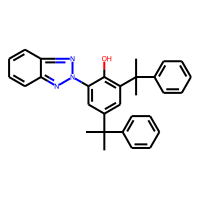

In [48]:
df.sample(1)

array([[<AxesSubplot:title={'center':'qed'}>]], dtype=object)

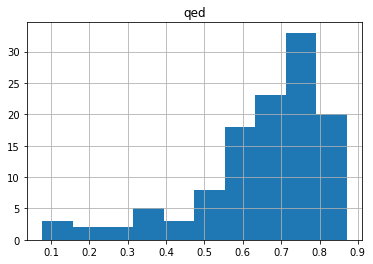

In [49]:
df.hist('qed')

<AxesSubplot:xlabel='MolLogP', ylabel='qed'>

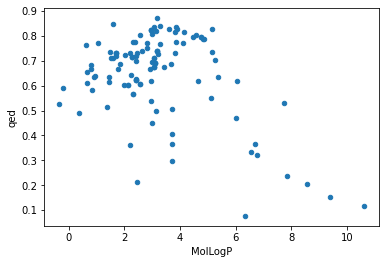

In [50]:
df.plot(kind='scatter', x='MolLogP', y='qed')

In [51]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
    
    except:
        print("Error", mol_idx)
        continue
        
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(117, 2048)


In [52]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_fp['ID'] = df['ID']
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,ID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335558
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335473
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335166
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334589
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,87558359
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87558322
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,87558311
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87558282


# No3

In [54]:
mol = quercetine_mol 

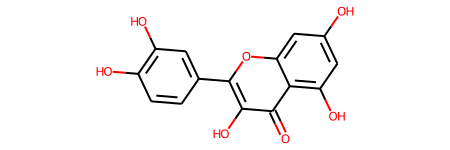

In [55]:
mol

In [56]:
ringinfo = mol.GetRingInfo()

In [57]:
ringinfo.NumRings()

3

In [58]:
bonds_info = mol.GetBonds()

In [59]:
len(bonds_info)

24

In [60]:
for bond in bonds_info:
    print("--"*10)
    begin_atom = bond.GetBeginAtom()
    end_atom = bond.GetEndAtom()
    print(begin_atom.GetSymbol())
    print(end_atom.GetSymbol())
    print(bond.GetBondType())

--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
SINGLE
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
O
DOUBLE
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
C
AROMATIC
--------------------
C
O
AROMATIC
--------------------
C
O
SINGLE
--------------------
C
O
SINGLE
--------------------
C
O
SINGLE
--------------------
C
O
SINGLE
--------------------
C
O
SINGLE
--------------------
C
C
AROMATIC
--------------------
O
C
AROMATIC
--------------------
C
C
AROMATIC


In [61]:
Chem.MolToSmiles(mol)

'O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12'

In [62]:
mol = Chem.MolFromSmiles("O=c1c(O)c(-c2ccc(O)c([O])c2)oc2cc(O)cc(O)c12")

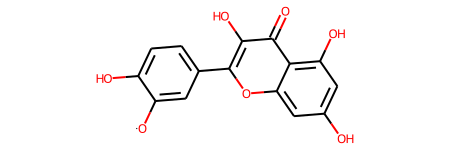

In [63]:
mol

In [64]:
mol = Chem.AddHs(mol)

In [65]:
atoms_info = mol.GetAtoms()
len(atoms_info)

31

In [66]:
for atom in atoms_info:
    print("--" * 10)
    print(atom.GetIdx(), end=(":"))
    print(atom.GetSymbol())
    print("radical:" + str(atom.GetNumRadicalElectrons()))
    print("charge:" + str(atom.GetFormalCharge()))

--------------------
0:O
radical:0
charge:0
--------------------
1:C
radical:0
charge:0
--------------------
2:C
radical:0
charge:0
--------------------
3:O
radical:0
charge:0
--------------------
4:C
radical:0
charge:0
--------------------
5:C
radical:0
charge:0
--------------------
6:C
radical:0
charge:0
--------------------
7:C
radical:0
charge:0
--------------------
8:C
radical:0
charge:0
--------------------
9:O
radical:0
charge:0
--------------------
10:C
radical:0
charge:0
--------------------
11:O
radical:1
charge:0
--------------------
12:C
radical:0
charge:0
--------------------
13:O
radical:0
charge:0
--------------------
14:C
radical:0
charge:0
--------------------
15:C
radical:0
charge:0
--------------------
16:C
radical:0
charge:0
--------------------
17:O
radical:0
charge:0
--------------------
18:C
radical:0
charge:0
--------------------
19:C
radical:0
charge:0
--------------------
20:O
radical:0
charge:0
--------------------
21:C
radical:0
charge:0
--------------------

In [67]:
for atom in atoms_info:
    if atom.GetNumRadicalElectrons() >= 1:
        print(atom.GetIdx(), end=(":"))
        print(atom.GetSymbol())

11:O


# No4

/opt/anaconda3/envs/lecture-beginner/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 3. Change the maxMols value to display more.
  warnings.warn(


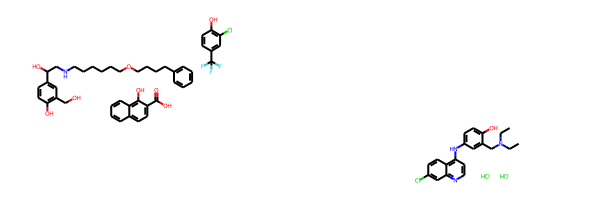

In [68]:
Draw.MolsToGridImage(mols, maxMols=3)

In [69]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()

In [70]:
mols2 = [lfc.choose(mol) for mol in mols]

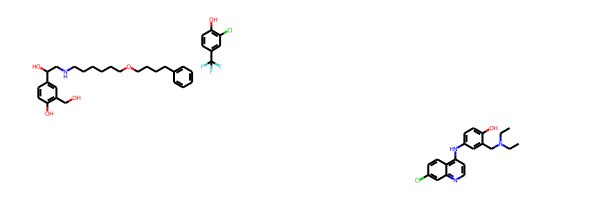

In [71]:
Draw.MolsToGridImage(mols2, maxMols=3)

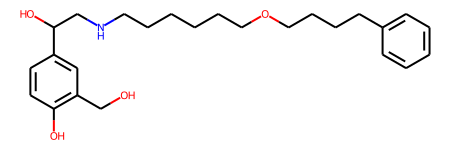

In [72]:
mols2[0]

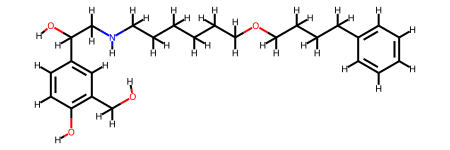

In [73]:
Chem.AddHs(mols2[0], addCoords=True)

In [74]:
mols2 = [Chem.AddHs(mol, addCoords=True) for mol in mols2]

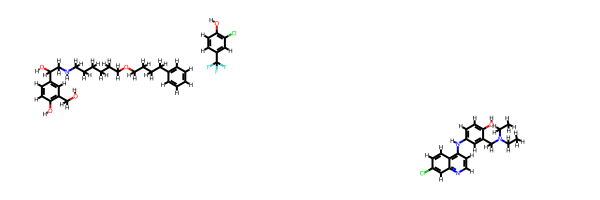

In [75]:
Draw.MolsToGridImage(mols2, maxMols=3)

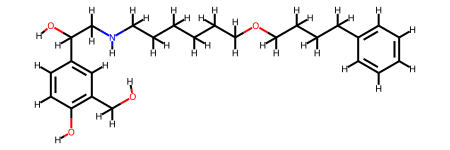

In [79]:
mols2[0]

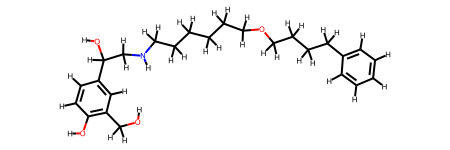

In [80]:
from rdkit.Chem import AllChem
n = 0

AllChem.MMFFOptimizeMolecule(mols2[n])
mols2[n]

# No5

/opt/anaconda3/envs/lecture-beginner/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


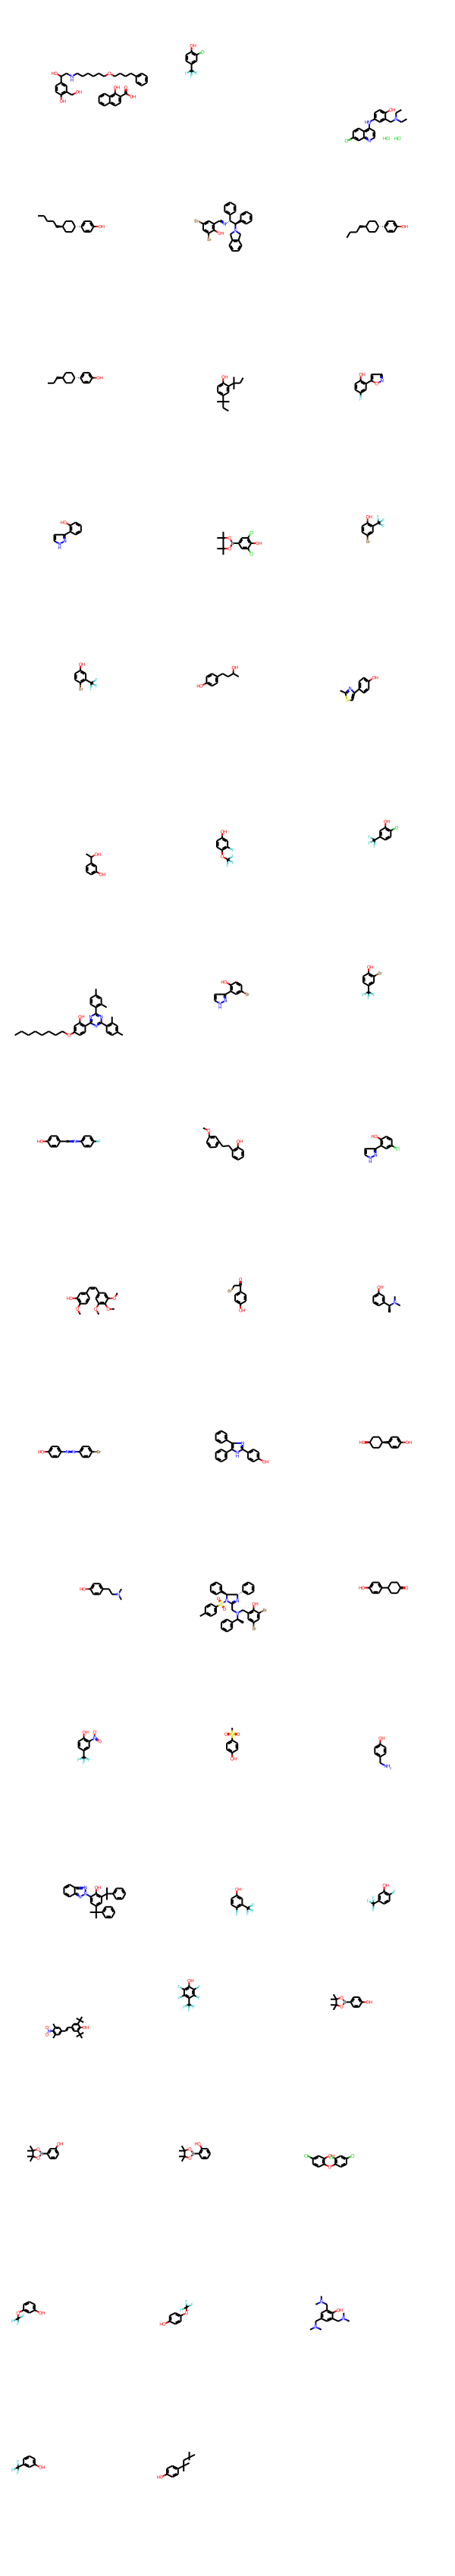

In [86]:
Draw.MolsToGridImage(mols)

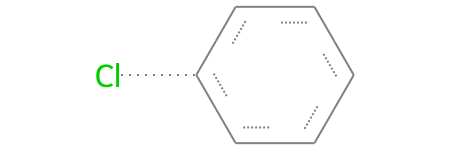

In [93]:
patt = Chem.MolFromSmarts('c1cc([Cl])ccc1')
patt

In [94]:
matches = [mol for mol in mols2 if mol.HasSubstructMatch(patt)]

In [95]:
len(matches)

10

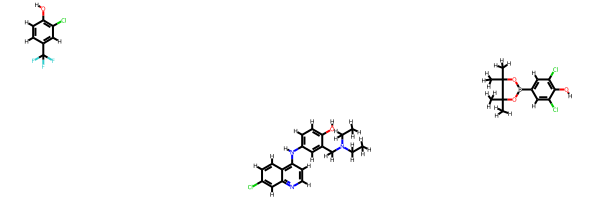

In [96]:
Draw.MolsToGridImage(matches, maxMols=3)